## ДЗ 1.
# Анализ и очистка данных.

**Цель**
* формирование практических навыков: 
    - переноса данных в среду фреймвока анализа, 
    - проведения первичного анализа признаков и объектов, 
    - оценки чистоты и полноты данных, определения основных статистических характеристик данных, 
    - проведения процедуры очистки данных от выбросов, 
    - проведение процедуры заполнения пропусков, 
    - проведение анализа связи признаков с целевым свойством, 
    - проведения селекции признаков на основе фильтрации, 
    - формирования отчета. 

* **Задачи**: 
    - выполнить загрузку всех составляющих данных, 
    - определить список предикторов и целевой признак, 
    - определить типы признаков и провести оценку их полноты, 
    - оценить сбалансированность данных по целевому признаку, 
    - определить класс задачи и провести очистку данных и операцию заполнения пробелов, 
    - провести анализ связей признаков с целью и установить факты мультиколлинеарности признаков, 
    - провести селекцию признаков. 
    - По результатам анализа сделать выводы о составе и качестве данных и реализовать пайплайн первичной обработки данных. 
    
* **Среда анализа** python-sklearn-scipy 

*  [Практическая часть](#practice)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
* [Курсовой проект](#course_project)
    * [Постановка задачи](#course_project_task)
    * [Примерное описание этапов выполнения курсового проекта](#course_project_steps)
    * [Обзор данных](#course_project_review)    

In [60]:


# необходимые пакеты
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd

import sklearn



## <center>Практическая часть<a class="anchor" id="practice"></a><center>

### 1. Выполнить загрузку всех составляющих данных


Требуется на основании демографических данных о клиентах банка, истории их платежей и состоянии счета, предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

- - - 

**Подключение библиотек и скриптов**

In [61]:
import numpy as np
import pandas as pd

**Пути к директориям и файлам**

In [62]:
# input

DATASET_PATH = 'course_project_train.csv'

# output
PREP_DATASET_PATH = 'training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

In [63]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


### 2. Определить список предикторов и целевой признак,

In [64]:
df.shape

(7500, 17)

In [65]:
df.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

**Целевой признак**: Credit Default


**Предикторы**: 

In [66]:
df.columns[:-1]

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score'],
      dtype='object')

### 3. Определить типы признаков и провести оценку их полноты

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

### Определить по числу значений признаков число пропусков: пропусков нет

In [68]:
rez = pd.DataFrame(data = np.zeros(len(df.columns)).reshape(-1,1),index =df.columns,columns =['пропусков'])
for name_ in df.columns:
    n_ = df[name_].isnull().sum()
    rez.loc[name_,['пропусков']] = n_
    if (n_)>0:
        print('в признаке', name_,' обнаружено ', n_, ' пропусков')
    else:
        print('в признаке', name_,' обнаружено 0 пропусков')    

в признаке Home Ownership  обнаружено 0 пропусков
в признаке Annual Income  обнаружено  1557  пропусков
в признаке Years in current job  обнаружено  371  пропусков
в признаке Tax Liens  обнаружено 0 пропусков
в признаке Number of Open Accounts  обнаружено 0 пропусков
в признаке Years of Credit History  обнаружено 0 пропусков
в признаке Maximum Open Credit  обнаружено 0 пропусков
в признаке Number of Credit Problems  обнаружено 0 пропусков
в признаке Months since last delinquent  обнаружено  4081  пропусков
в признаке Bankruptcies  обнаружено  14  пропусков
в признаке Purpose  обнаружено 0 пропусков
в признаке Term  обнаружено 0 пропусков
в признаке Current Loan Amount  обнаружено 0 пропусков
в признаке Current Credit Balance  обнаружено 0 пропусков
в признаке Monthly Debt  обнаружено 0 пропусков
в признаке Credit Score  обнаружено  1557  пропусков
в признаке Credit Default  обнаружено 0 пропусков


**Вывод**: Пропуски в признаках

In [69]:
rez

,пропусков
Home Ownership,0.0
Annual Income,1557.0
Years in current job,371.0
Tax Liens,0.0
Number of Open Accounts,0.0
Years of Credit History,0.0
Maximum Open Credit,0.0
Number of Credit Problems,0.0
Months since last delinquent,4081.0
Bankruptcies,14.0


### Приведение типов<a class="anchor" id="cast"></a>

Сделаем все не числовые типы строками

In [70]:
for colname in ['Years in current job', 'Home Ownership', 'Purpose', 'Term']:
    df[colname] = df[colname].astype(str)

In [71]:
df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [72]:
rez['тип'] =''
for name_ in df.columns:
    rez.loc[name_,'тип'] = df[name_].dtype
rez    

,пропусков,тип
Home Ownership,0.0,object
Annual Income,1557.0,float64
Years in current job,371.0,object
Tax Liens,0.0,float64
Number of Open Accounts,0.0,float64
Years of Credit History,0.0,float64
Maximum Open Credit,0.0,float64
Number of Credit Problems,0.0,float64
Months since last delinquent,4081.0,float64
Bankruptcies,14.0,float64


**Результат**: Все признаки числового или строкового типа

### 4. Оценить сбалансированность данных по целевому признаку 
#### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [73]:
df['Credit Default'].value_counts()
target = 'Credit Default'

**Вывод**: Выборка сильно разбалансирована.

**Обзор количественных признаков**

In [74]:
d_df = df.describe()
num_col = d_df.columns[:-1]
d_df

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [75]:
rez['moda'] = -1
rez['median'] = 0
rez['max'] = 0
rez['min'] = 0
rez['unique'] = -1
rez['std'] = 0

rez.loc[d_df.columns,'std'] = d_df.loc['std',:].values.T
rez.loc[d_df.columns,'max'] = d_df.loc['max',:].values.T
rez.loc[d_df.columns,'min'] = d_df.loc['min',:].values.T
rez.loc[d_df.columns,'median'] = d_df.loc['50%',:].values.T
rez

,пропусков,тип,moda,median,max,min,unique,std
Home Ownership,0.0,object,-1,0.0,0.000000e+00,0.0,-1,0.000000e+00
Annual Income,1557.0,float64,-1,1168386.0,1.014934e+07,164597.0,-1,8.453392e+05
Years in current job,371.0,object,-1,0.0,0.000000e+00,0.0,-1,0.000000e+00
Tax Liens,0.0,float64,-1,0.0,7.000000e+00,0.0,-1,2.716035e-01
Number of Open Accounts,0.0,float64,-1,10.0,4.300000e+01,2.0,-1,4.908924e+00
Years of Credit History,0.0,float64,-1,17.0,5.770000e+01,4.0,-1,7.041946e+00
Maximum Open Credit,0.0,float64,-1,478159.0,1.304726e+09,0.0,-1,1.602622e+07
Number of Credit Problems,0.0,float64,-1,0.0,7.000000e+00,0.0,-1,4.985978e-01
Months since last delinquent,4081.0,float64,-1,32.0,1.180000e+02,0.0,-1,2.168881e+01
Bankruptcies,14.0,float64,-1,0.0,4.000000e+00,0.0,-1,3.471917e-01


In [76]:
n_col = df.select_dtypes(include='object').columns
n_col

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

**Обзор номинативных признаков**

In [77]:


for i,cat_colname in enumerate(n_col):
    c_df = df[cat_colname].value_counts()

    rez.loc[cat_colname,['unique','moda','max','min','std']] = [c_df.shape[0],c_df.index[0],c_df[0],c_df[-1],c_df.std()]
    print(str(cat_colname) + '\n\n' + str(c_df) + '\n' + '*' * 100 + '\n')
rez   

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
nan           371
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses 

,пропусков,тип,moda,median,max,min,unique,std
Home Ownership,0.0,object,Home Mortgage,0.0,3.637000e+03,12.0,4,1.811964e+03
Annual Income,1557.0,float64,-1,1168386.0,1.014934e+07,164597.0,-1,8.453392e+05
Years in current job,371.0,object,10+ years,0.0,2.332000e+03,259.0,12,5.516328e+02
Tax Liens,0.0,float64,-1,0.0,7.000000e+00,0.0,-1,2.716035e-01
Number of Open Accounts,0.0,float64,-1,10.0,4.300000e+01,2.0,-1,4.908924e+00
Years of Credit History,0.0,float64,-1,17.0,5.770000e+01,4.0,-1,7.041946e+00
Maximum Open Credit,0.0,float64,-1,478159.0,1.304726e+09,0.0,-1,1.602622e+07
Number of Credit Problems,0.0,float64,-1,0.0,7.000000e+00,0.0,-1,4.985978e-01
Months since last delinquent,4081.0,float64,-1,32.0,1.180000e+02,0.0,-1,2.168881e+01
Bankruptcies,14.0,float64,-1,0.0,4.000000e+00,0.0,-1,3.471917e-01


**Выводы**:
    
    1) Term : 2 уникальных значения, разбалансирована (5556/1944) (Гипотеза для проверки : ничего не нужно делать)
    2) Purpose : 15 уникальных значений, большая разница по числу значений моды и минора, значения 1, 2, 3 и 4 составляют основную часть выборки (Гипотеза для проверки : оставшиеся значения, вероятно нужно распределить по ним) 
    3) ....
    
    9) Home Ownership	  1tе и 2е  значения основная часть примеров (Гипотеза для проверки : оставшиеся значения, вероятно нужно распределить по ним или объединить в новое значение)
        

### 5. Определить класс задачи

**РЕщаем задачу классификации, т.к. целевлй признак имеет только 2 значения**

### 6. Провести очистку данных и операцию заполнения пробелов

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [78]:
rez['пропусков']

Home Ownership                     0.0
Annual Income                   1557.0
Years in current job             371.0
Tax Liens                          0.0
Number of Open Accounts            0.0
Years of Credit History            0.0
Maximum Open Credit                0.0
Number of Credit Problems          0.0
Months since last delinquent    4081.0
Bankruptcies                      14.0
Purpose                            0.0
Term                               0.0
Current Loan Amount                0.0
Current Credit Balance             0.0
Monthly Debt                       0.0
Credit Score                    1557.0
Credit Default                     0.0
Name: пропусков, dtype: float64

In [79]:
df['Annual Income'].fillna(df['Annual Income'].median(),inplace = True,)

In [80]:
df['Months since last delinquent'].fillna(df['Months since last delinquent'].median(),inplace = True,)

In [81]:
df['Credit Score'].fillna(df['Credit Score'].median(),inplace = True,)

In [82]:
df['Bankruptcies'].fillna(0,inplace = True,)

### Обработка выбросов<a class="anchor" id="outliers"></a>

In [83]:
df[n_col].head()

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,nan,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term


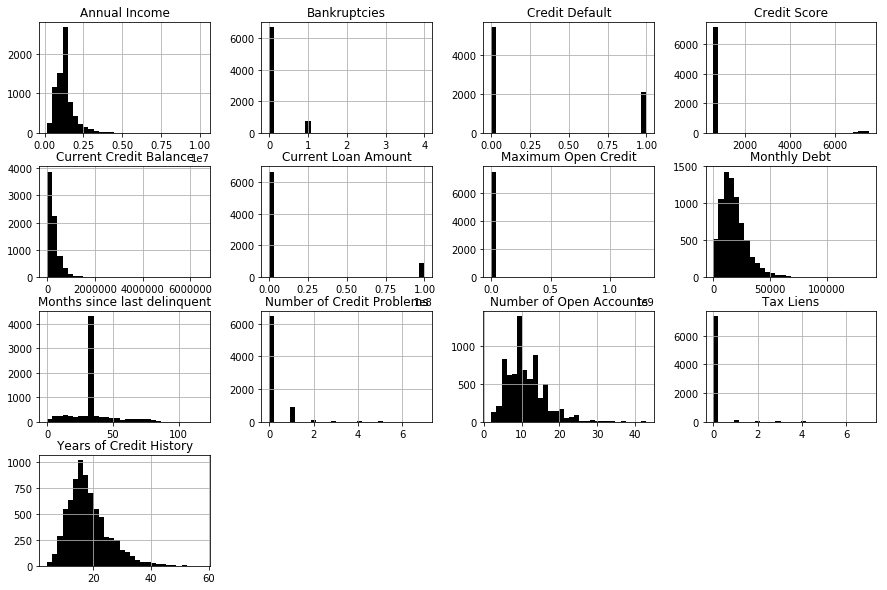

In [84]:
df.hist(color="k", bins=30, figsize=(15, 10))
plt.show()


In [85]:
from scipy import stats

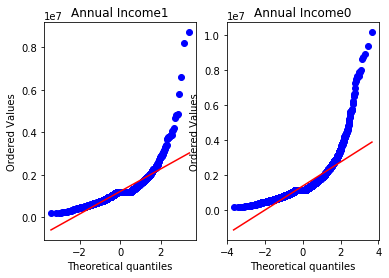

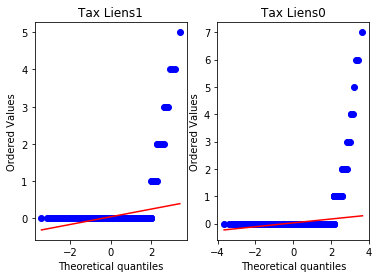

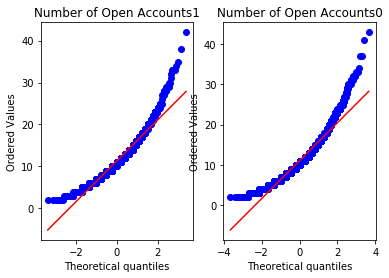

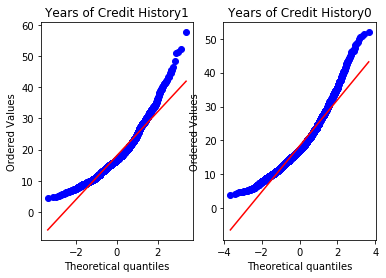

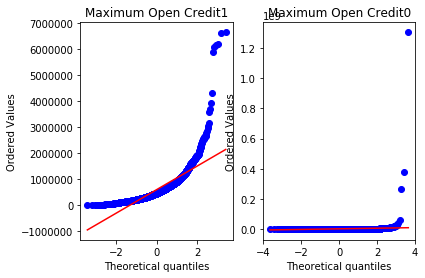

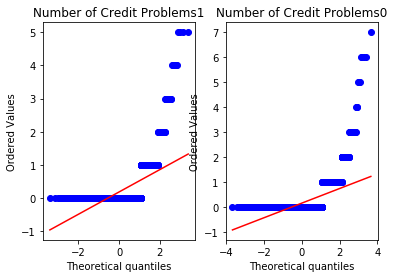

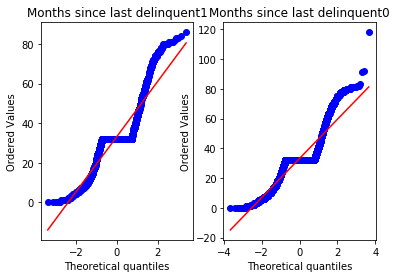

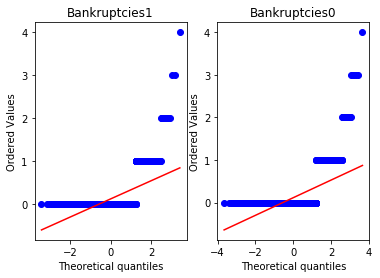

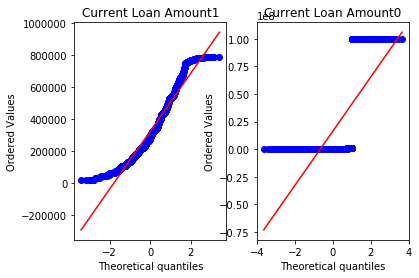

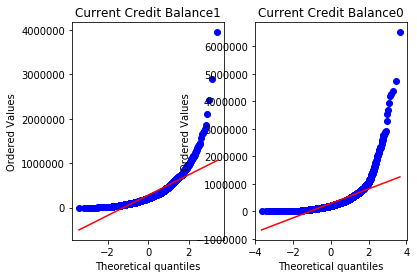

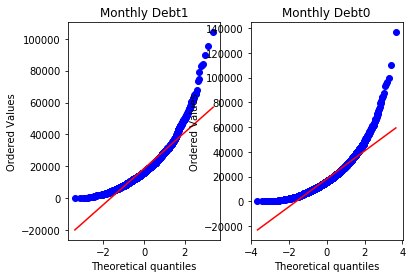

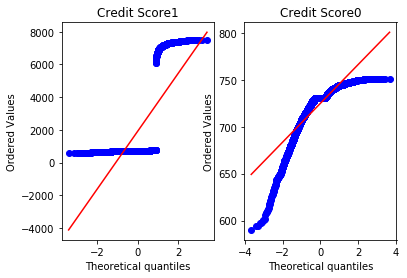

In [86]:
for name_ in num_col:
    fig1, (ax1, ax2) = plt.subplots(1,2)
    
    p1 = stats.probplot(df.loc[df[target] == 1,name_ ], dist=stats.norm, plot=ax1)
    p2 = stats.probplot(df.loc[df[target] == 0,name_ ], dist=stats.norm, plot=ax2)

    ax1.set_title(name_ +'1')
    ax2.set_title(name_+'0')


Законы не нормальные

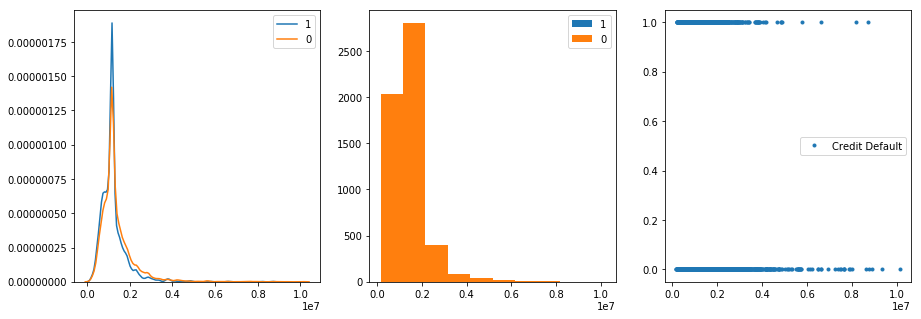

no kde


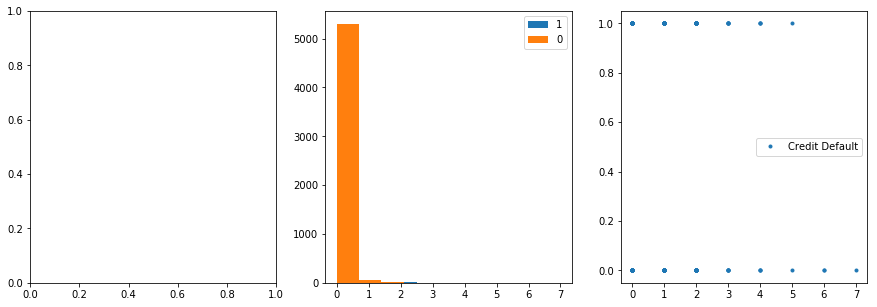

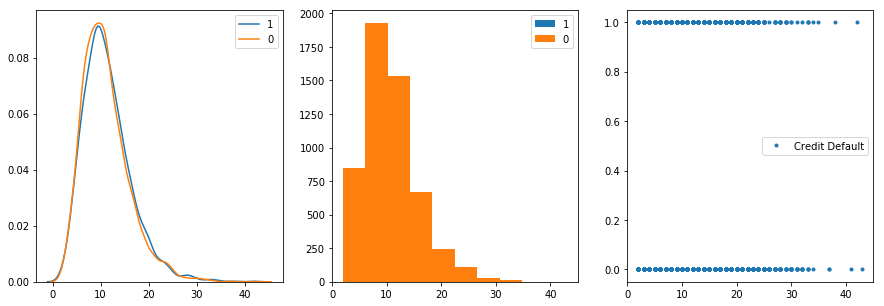

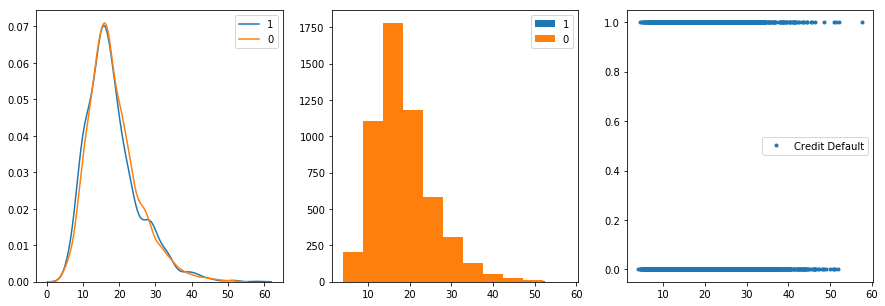

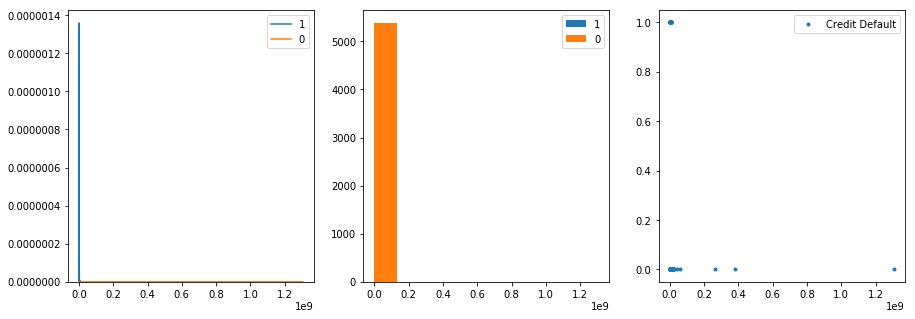

no kde


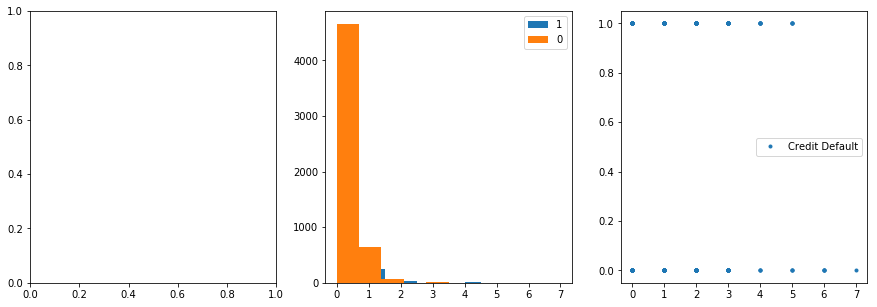

no kde


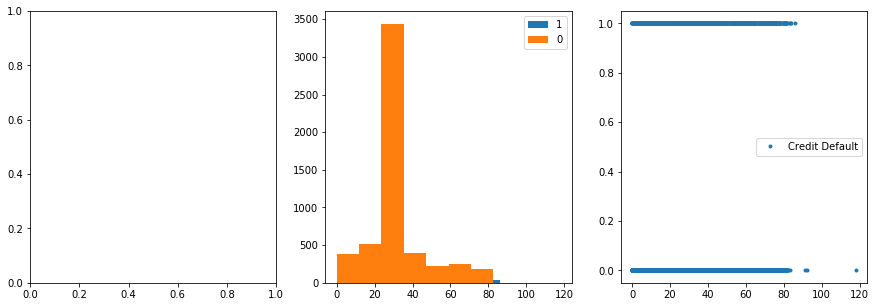

no kde


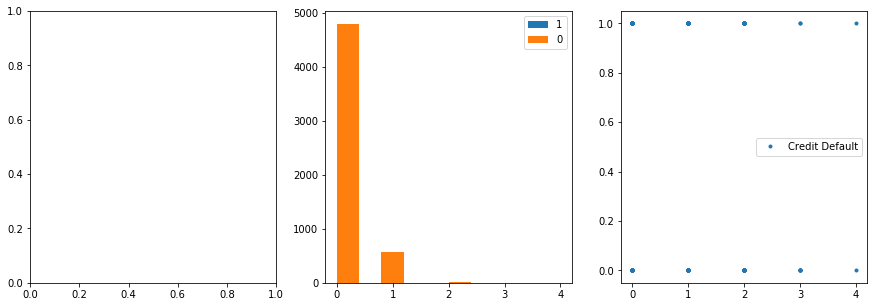

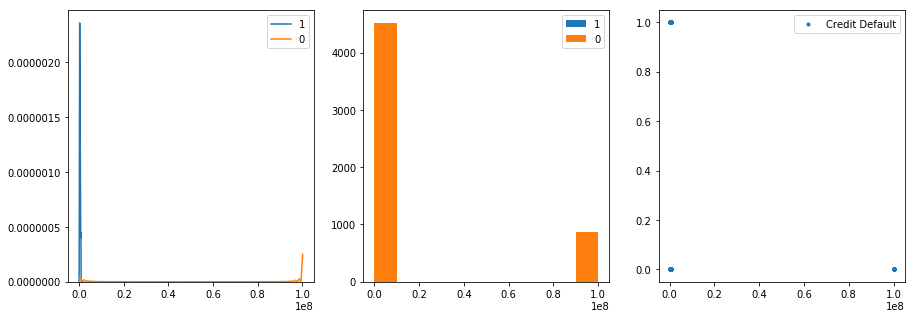

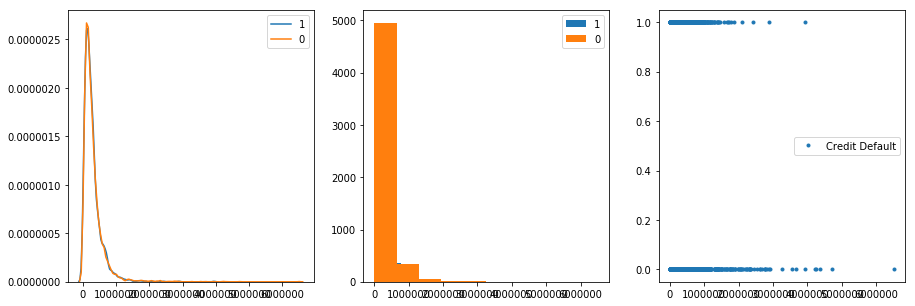

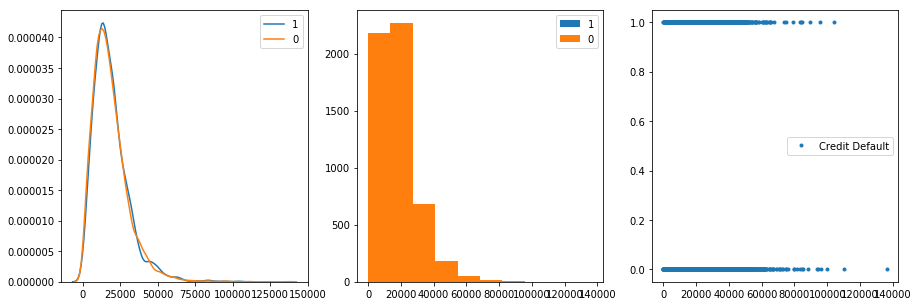

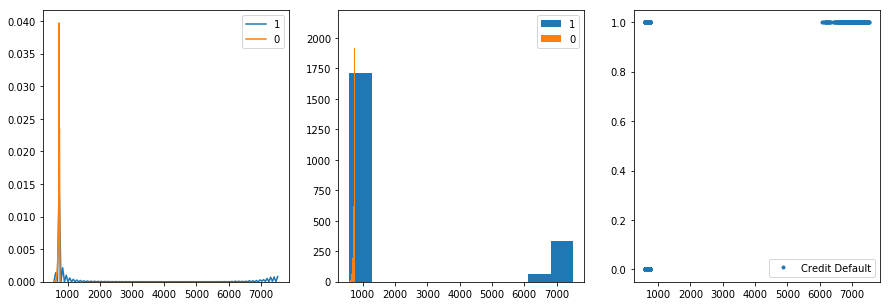

In [87]:
for name_ in num_col:
  plt.figure(figsize = (15,5))

  plt.subplot(1,3,2)
  plt.hist(df.loc[df[target] == 1,name_ ],label = '1')
  plt.hist(df.loc[df[target] == 0,name_ ],label = '0')
  plt.legend()

  plt.subplot(1,3,3)
  plt.plot(df[name_ ],df[target],'.')
  
  plt.legend()
  
  plt.subplot(1,3,1)
  try:
        sns.kdeplot(df.loc[df[target] == 1,name_ ],label = '1')
        sns.kdeplot(df.loc[df[target] == 0,name_ ],label = '0')
        plt.legend()
  except:
        print('no kde')
  plt.show()  
    

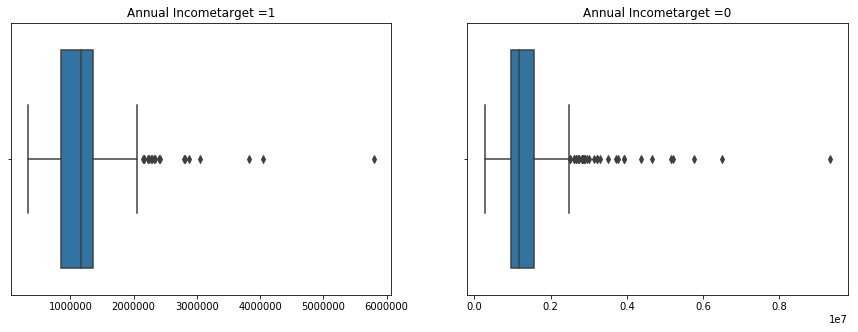

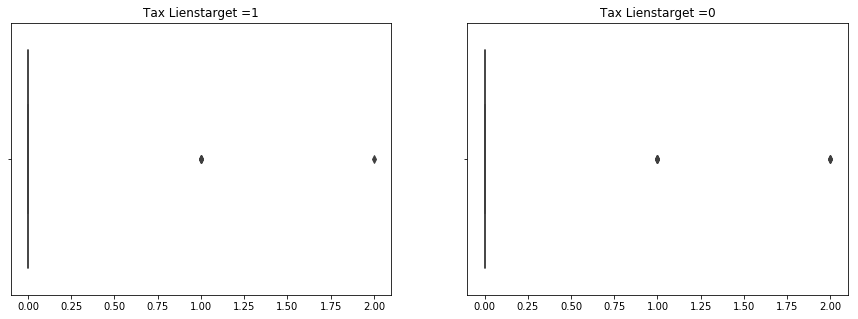

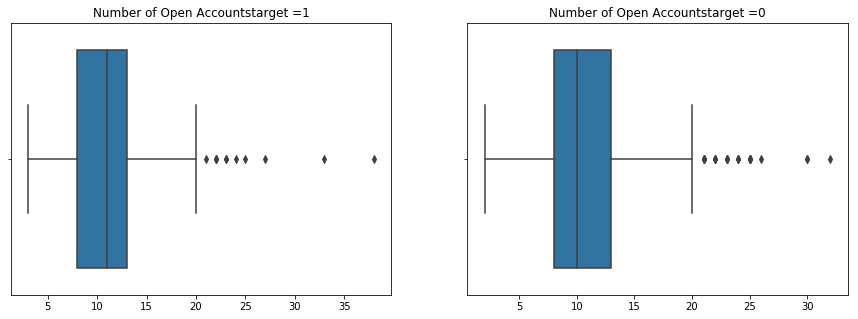

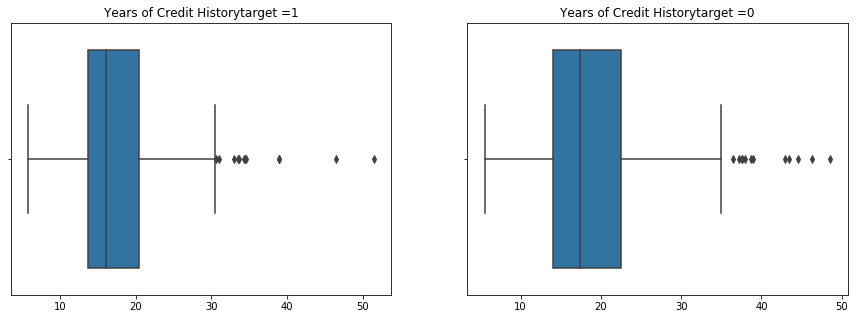

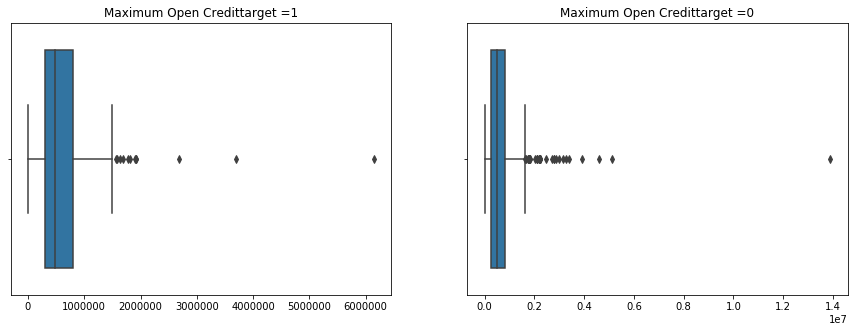

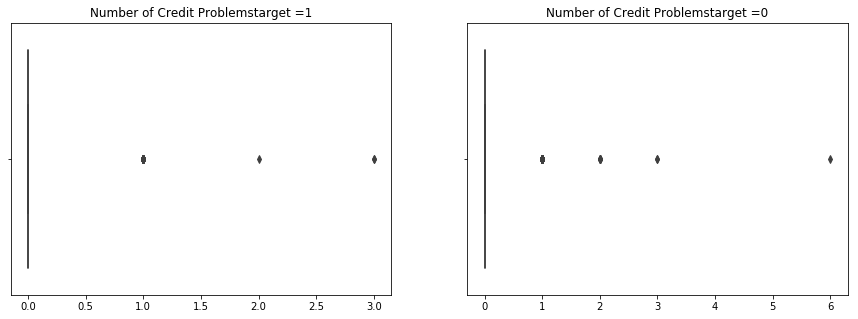

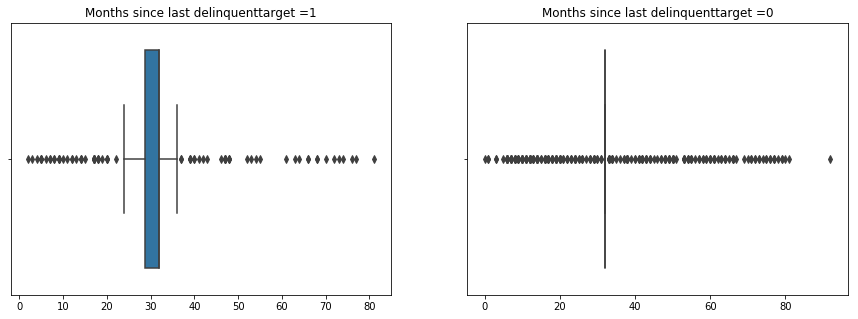

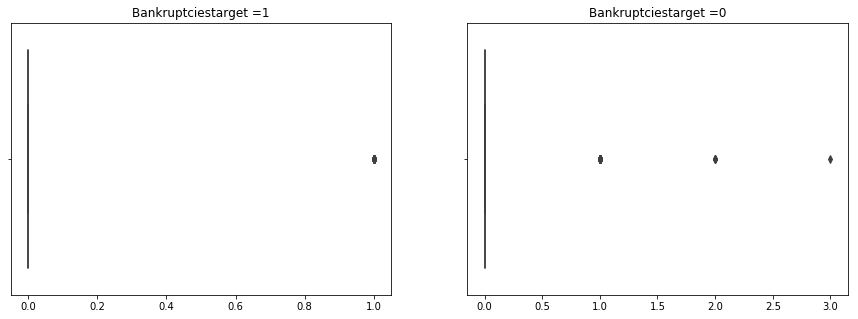

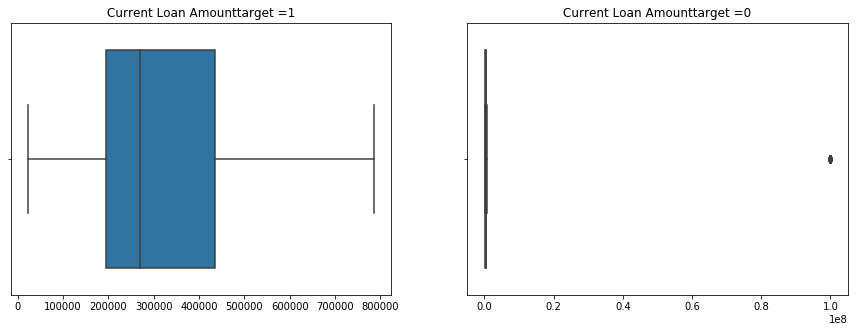

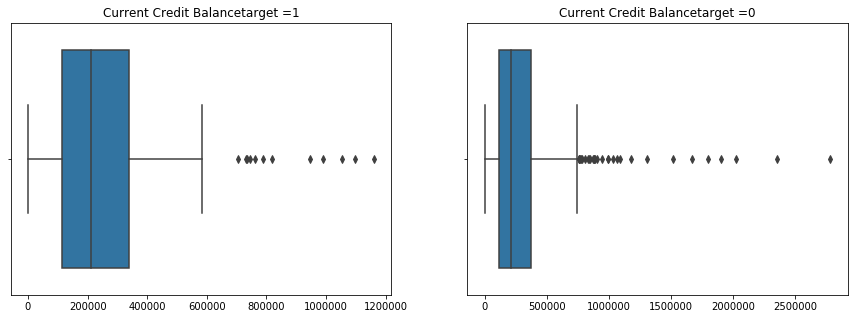

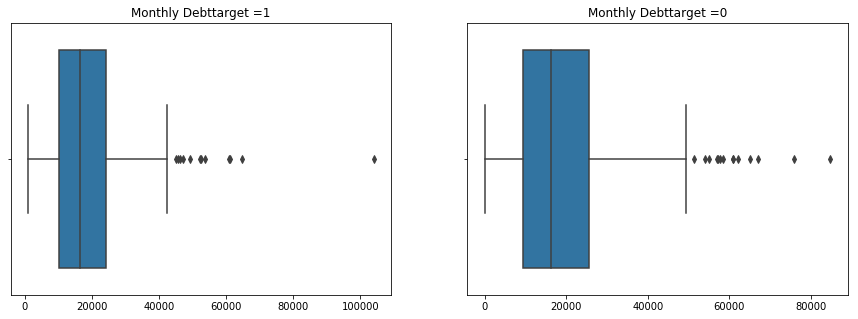

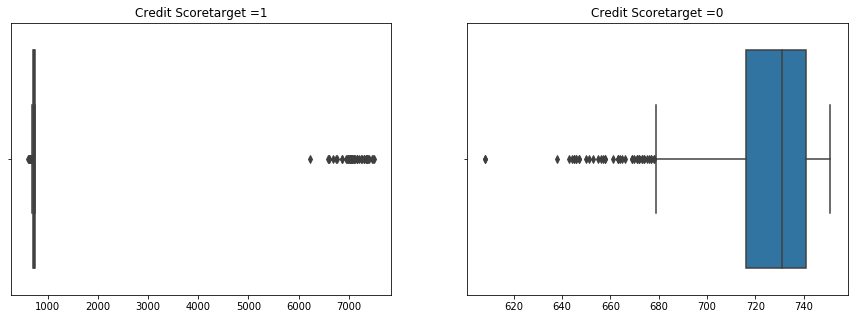

In [88]:
for name_ in num_col:
    dfs = df.sample(frac=0.1)
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.title(name_+'target =1')
    sns.boxplot(dfs.loc[dfs[target]==1,name_ ].values)
    plt.subplot(1,2,2)
    sns.boxplot(dfs.loc[dfs[target]==0,name_ ].values)
    plt.title(name_+'target =0')
    plt.show()  


**Вывод:** 
    - Выбросы есть 
    - закон распределенгия не нормальный (Гипотеза : провести нормализацию через логарифмические преобразования)

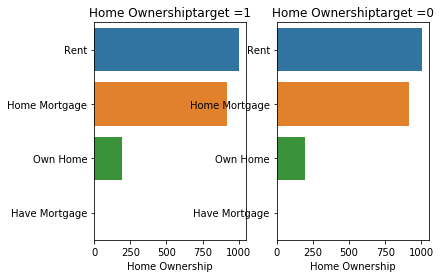

Home Ownership: 
 [[1003, 916, 192, 2], [1003, 916, 192, 2]]


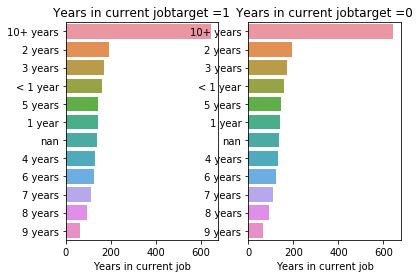

Years in current job: 
 [[644, 193, 170, 159, 145, 142, 137, 131, 124, 111, 92, 65], [644, 193, 170, 159, 145, 142, 137, 131, 124, 111, 92, 65]]


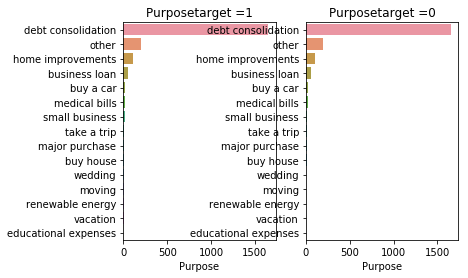

Purpose: 
 [[1654, 197, 108, 55, 24, 22, 14, 10, 9, 9, 4, 2, 2, 2, 1], [1654, 197, 108, 55, 24, 22, 14, 10, 9, 9, 4, 2, 2, 2, 1]]


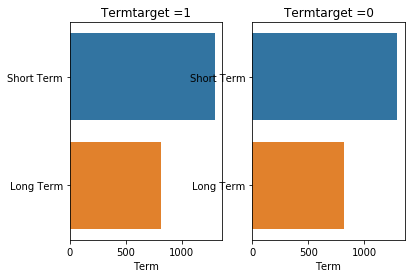

Term: 
 [[1297, 816], [1297, 816]]


In [30]:

cat_hist ={}
for name_ in n_col:
    dfs = df.sample(frac=1)
    d1 = dfs.loc[dfs[target]==1,name_ ].value_counts()
    d0 = dfs.loc[dfs[target]==1,name_ ].value_counts()
    dn = [d1.values.T.tolist(),d0.values.T.tolist()]
    plt.subplot(1,2,1)
    plt.title(name_+'target =1')
    sns.barplot(d1,y=d1.index)
    plt.subplot(1,2,2)
    plt.title(name_+'target =0')
    sns.barplot(d0,y=d0.index)
    plt.show()
    cat_hist[name_]=dn
    print(name_+': \n',dn) 

### 7. Селекция

Text(0.5, 1.0, 'Взаимные парные корреляции признаков')

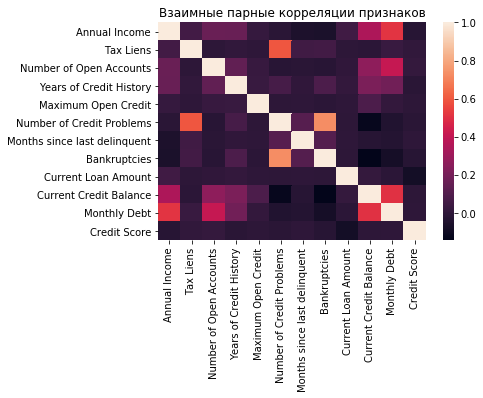

In [41]:
# Взаимные парные корреляции признаков
cc=np.corrcoef(df.loc[:,num_col].values.T)

sns.heatmap(data=cc, xticklabels=df.loc[:,num_col].columns, yticklabels=df.loc[:,num_col].columns)
plt.title('Взаимные парные корреляции признаков')

Для вывода: ищем сс больше 0.7 - это мультиколлинеарность

In [44]:
np.where(cc>0.7)

(array([ 0,  1,  2,  3,  4,  5,  5,  6,  7,  7,  8,  9, 10, 11],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  7,  6,  5,  7,  8,  9, 10, 11],
       dtype=int64))

Все значения на диагонали, это сам с собой.

**Вывод**: мультиколлинеарных нет

Можно сделать стат.тесты для категорийных и численных признаков:
    - различимость распределений в разрезе целевой переменной (определит важность признака - чем различимей, тем лучше) -  ttest_rel
    - сходство частот (позволит уменьшить число категорий в признаке для номинальных) chi2_contingency

In [95]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from scipy.stats import ks_2samp, chi2_contingency

In [96]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,nan,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [97]:
df['ID'] = np.arange(df.shape[0])

In [98]:
def cat_merge(X_,Y10,ID,FEATURE_NAME):
  '''
  Исследование на близость категорий по распределению
  Принимаем:
  X_, - твблица данных - pandas DataFrame
  Y10 - целевое свойство  - категорийного типа (непрерывное переводим на интервалы)
  ID, - номер уникальный , для подсчета объектов
  FEATURE_NAME - исследуемый признак
  
  Действие:
  вдоль целевого свойства смотрим на различимость распределений значений исследуемого признака
  по тесту Хи2 

  Возвращаем 
  CHI_ - значения p-value для пар значений признака в виде матрицы (строка/столбец - отдельные значения),
  numb_b
  '''
  TARGET_NAME = 'Y10'
  X_[TARGET_NAME] = Y10
  b_max = len(X_[FEATURE_NAME].unique()) #  сколько категорий
  CHI_ = []
  numb_b ={}
  # смотрим на пары категорий
  for i_br in X_[FEATURE_NAME].unique():
    # сохраняем число примеров для этого значения по всем данным
    numb_b[str(i_br)] = X_.loc[X_[FEATURE_NAME].isin([i_br]), :].shape[0]
    for j_br in X_[FEATURE_NAME].unique():
      # выделили подтаблицу
      X_d = X_.loc[X_[FEATURE_NAME].isin([i_br, j_br]), [ID,FEATURE_NAME, TARGET_NAME]]
      # выбираем число примеров для оценки в тесте Хи2
      if X_d.shape[0]>1000:
        n_samples = 1000
      else:
        n_samples = X_d.shape[0] 
      # если значения есть, то оценим, иначе р=0  
      if n_samples>0:
        rez_s = X_.loc[X_[FEATURE_NAME].isin([i_br, j_br]), [ID,FEATURE_NAME, TARGET_NAME]].sample(n_samples)
        # частоты по значениям цели для значений признака
        table = rez_s.pivot_table(values=ID, index=TARGET_NAME, columns=FEATURE_NAME, aggfunc='count')+5
        table.fillna(5,inplace=True)
        chi2, p, dof, expected = chi2_contingency( table, correction=False)
      else:
        p = 0
      CHI_.append( p)
  CHI_ = np.array(CHI_).reshape((b_max,b_max))
  # чем белее, тем больше оснований для объединения значений
  sns.heatmap(data = CHI_, xticklabels=X_[FEATURE_NAME].unique(),yticklabels=X_[FEATURE_NAME].unique())
  print(numb_b)
  return CHI_,numb_b

{'Own Home': 647, 'Home Mortgage': 3637, 'Rent': 3204, 'Have Mortgage': 12}


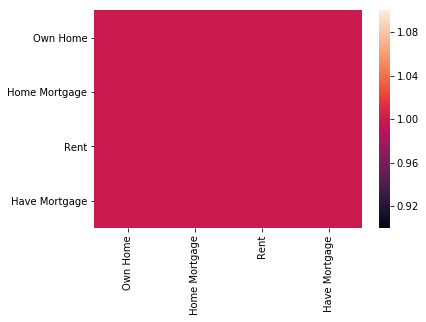

In [99]:
chi_bed,numb_bed = cat_merge(df.loc[:,n_col[:1]],df[ target], 'ID',n_col[0])

Вывод: нет когеррентных

Сделаем категорийные признаки числовыми (pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)):
    

In [101]:
df = pd.get_dummies(df,columns = n_col, prefix=n_col, prefix_sep='_', dummy_na=True )

df.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Purpose_nan,Term_Long Term,Term_Short Term,Term_nan
0,482087.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,99999999.0,47386.0,...,0,0,0,0,0,0,0,0,1,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,264968.0,394972.0,...,0,0,0,0,0,0,0,1,0,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,99999999.0,308389.0,...,0,0,0,0,0,0,0,0,1,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,121396.0,95855.0,...,0,0,0,0,0,0,0,0,1,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,125840.0,93309.0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 51 columns):
Annual Income                     7500 non-null float64
Tax Liens                         7500 non-null float64
Number of Open Accounts           7500 non-null float64
Years of Credit History           7500 non-null float64
Maximum Open Credit               7500 non-null float64
Number of Credit Problems         7500 non-null float64
Months since last delinquent      7500 non-null float64
Bankruptcies                      7500 non-null float64
Current Loan Amount               7500 non-null float64
Current Credit Balance            7500 non-null float64
Monthly Debt                      7500 non-null float64
Credit Score                      7500 non-null float64
Credit Default                    7500 non-null int64
ID                                7500 non-null int32
Home Ownership_Have Mortgage      7500 non-null uint8
Home Ownership_Home Mortgage      7500 non-null uint8
Home 

Text(0.5, 1.0, 'Взаимные парные корреляции признаков')

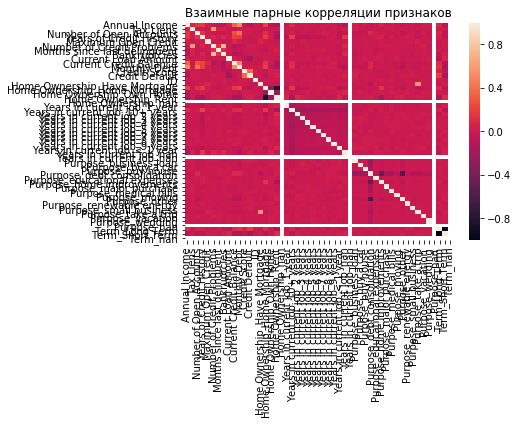

In [103]:
# Взаимные парные корреляции всех признаков
cc=np.corrcoef(df.values.T)

sns.heatmap(data=cc, xticklabels=df.columns, yticklabels=df.columns)
plt.title('Взаимные парные корреляции признаков')

In [104]:
p_c = np.where(cc>0.7)
for i in range(df.shape[1]):
    for j in range(i+1,df.shape[1]):
        if cc[i,j]>0.7:
            print('высокая корреляция ',i,' c ', j)

высокая корреляция  5  c  7


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


Вывод: Все признаки кроме пары 5-7 рабочие

### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [19]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

Выводы:
    - кратко перечислить все выводы